# Gráfica de la cresta o función de theta vs. alpha

## Importemos la librerías necesarias

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## Los datos y la variable objetivo 

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 3 + 2*X + 1*X**2 + np.random.randn(m, 1)

## Creación de arreglo de valores para el hiperparámetro $\alpha$ 

In [3]:
alphas=np.logspace(start=-3,stop=5,num=100) 
n=6

## Importación de las librerías de scikit-learn necesarias 

In [4]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error 
from sklearn.base import clone 

# Utilización de las clases PolynomialFeatures y StandardScaler  

In [5]:
poly_features=PolynomialFeatures(degree=n,include_bias=False) 
X_poly=poly_features.fit_transform(X) 
X_poly_scaler= StandardScaler() 
X_poly=X_poly_scaler.fit_transform(X_poly) 

# Aplicación de la regularización Ridge para cada valor de $\alpha$ en el arreglo alphas 

In [6]:
thetas = []
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_reg.fit(X_poly, y)
    thetas.append(ridge_reg.coef_) 

## Graficar $\theta$ vs $\alpha$

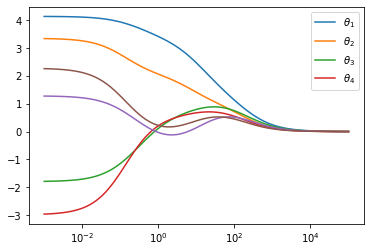

In [7]:
for j in range(n):
    plt.plot(alphas,[thetas[i][0][j] for i in range(100)]) 
    plt.xscale('log') 
    plt.legend([r'$\theta_{1}$',r'$\theta_{2}$',r'$\theta_{3}$',r'$\theta_{4}$'])
      

## Determinación del valor de $\alpha$ que produce el mejor rendimiento. 

In [19]:
minimum_val_error = float('inf')
best_alpha = None
best_model = None
alphas=np.logspace(-13,2,4000) 
for alpha in alphas: 
    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_reg.fit(X_poly, y)                         # continues where it left off
    y_val_predict = ridge_reg.predict(X_poly)
    val_error = mean_squared_error(y, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_alpha = alpha
        

In [20]:
print(best_alpha) 

8.574983801732705e-11


In [21]:
15300/340

45.0

In [22]:
125*3.3+140*0.32+45*1.2+130*0.52 

578.9

In [23]:
6*8500

51000

# Trazar los coeficientes de Ridge en función de la regularización

[Plot Ridge coefficients as a function of the regularization](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py) 

Shows the effect of collinearity in the coefficients of an estimator.

Ridge Regression is the estimator used in this example.   

Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter.

This example also shows the usefulness of applying Ridge regression to highly ill-conditioned matrices. 

For such matrices, a slight change in the target variable can cause huge variances in the calculated weights.   

In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise).

When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero.   

At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations.  

In practice it is necessary to tune alpha in such a way that a balance is maintained between both.

In [ ]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

In [ ]:
print(__doc__)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

In [ ]:
# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

In [ ]:
# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Parada anticipada

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum.

This is called early stopping. Figure 4-20 shows a complex model (in this case, a high-degree Polynomial Regression model) being trained with Batch Gradient Descent.   

As the epochs go by the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while though, the validation error stops decreasing and starts to go back up.   

This indicates that the model has started to overfit the training data.   

With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”

In [ ]:
from IPython.display import Image 
Image('figure_4_20.JPG',width=600,height=300) 

## TIP

With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be
hard to know whether you have reached the minimum or not.   

One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

Here is a basic implementation of early stopping:

In [ ]:
import numpy as np 
np.random.seed(48) 
m=100
X=np.random.rand(m,1)
y=3+2*X+X**2 + np.random.randn(m,1) 

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2) 

In [ ]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDRegressor 
# prepare the data
poly_scaler = Pipeline([
("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
penalty=None, learning_rate="constant", eta0=0.0005)